In [209]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import lambertw

[153]
153


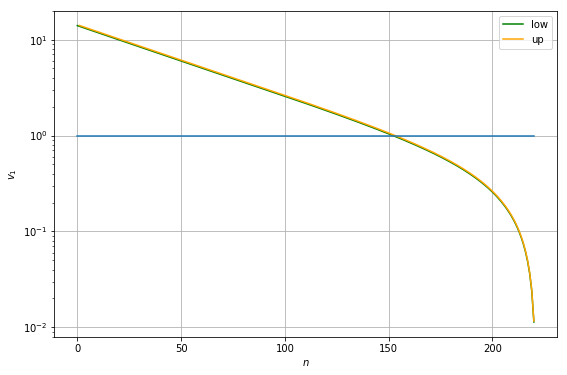

In [210]:
# some givens
slack_eps = 10
N = 300
C0 = 1
v = 0.98

n = np.arange(N)
n_bis = np.arange(1,N)
k = np.arange(N)

C_1 = (slack_eps-C0*(v**(N-n)-v**N)/(1-v))/(N-n)
v_1 = C_1*(C0*v**(N-1-k))**(-1)
v_1_bis = C_1[1:]*(C0*v**(N-n_bis))**(-1)
indices_1 = n[v_1>0]
ok_indices_1 = k[(v_1<=1) & (v_1>0)]
indices_1_bis = n_bis[v_1_bis>0]
ok_indices_1_bis = n_bis[(v_1_bis>1)]


print(np.intersect1d(ok_indices_1,ok_indices_1_bis))
print(ok_indices_1[0])
plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$v_1$')
plt.semilogy(indices_1,v_1[v_1>0],color='green')
plt.semilogy(indices_1_bis,v_1_bis[v_1_bis>0],color='orange')
plt.semilogy(indices_1,np.ones(len(indices_1)))
plt.legend(['low','up']);

In [211]:
# fun num
def Nb_num(slack_eps,N=250,v=0.98,C0=1):
    n = np.arange(N)
    n_bis = np.arange(1,N)
    k = np.arange(N)
    C_1 = (slack_eps-C0*(v**(N-n)-v**N)/(1-v))/(N-n)
    v_1 = C_1*(C0*v**(N-1-k))**(-1)
    ok_indices_1 = k[(v_1<=1) & (v_1>0)]
    if len(ok_indices_1) > 0:
        return ok_indices_1[0]
    else:
        return N

def Nb_try(slack_eps,N=250,v=0.98,C0=1):
    n = np.arange(N)
    arg_lhs = (1-v)/C0*slack_eps + v**N
    arg_rhs = v**(N-n)*(1+(N-n)*(1-v)/v)
    ok_indices_1 = n[arg_rhs>=arg_lhs]
    if len(ok_indices_1) > 0:
        return ok_indices_1[0]
    else:
        return N
    
# fun analytical
def Nb_ana(slack_eps,N=250,v=0.98,C0=1):
    arg_lambert_w0 = ((1-v)/C0*slack_eps + v**N)*v**(1/(1-v))*(np.log(v)/(1-v))
    print(-1/np.exp(1))
    print(arg_lambert_w0)
    val_lambert_w0 = np.real(lambertw(arg_lambert_w0,k=0))
    print(val_lambert_w0)
    return np.ceil(N-val_lambert_w0/np.log(v)+(v/(1-v)))

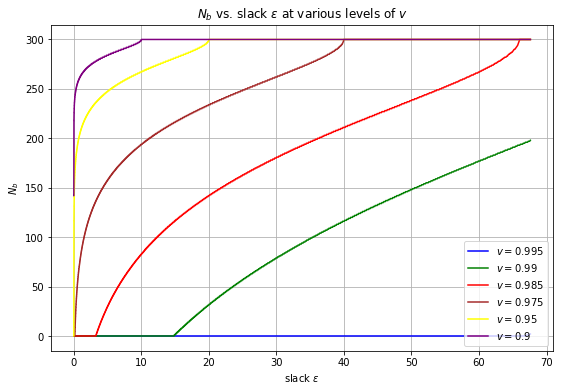

In [285]:
N = 300
C0 = 1
vector2 = np.logspace(-5,1.83,10000)

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. slack $\epsilon$ at various levels of $v$')

v = 0.995

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)/C0*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='blue');

v = 0.99

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)/C0*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='green');

v = 0.985

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)/C0*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='red');

v = 0.975
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)/C0*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='brown');

v = 0.95
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)/C0*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='yellow');

v = 0.9
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)/C0*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='purple');

plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
plt.xlabel('slack $\epsilon$')
plt.ylabel('$N_b$');